In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import numpy as np

In [25]:
data=pd.read_csv("NIFTY 500_daily_data.csv")
data.head(5)

,date,open,high,low,close,volume
0,2015-01-01 00:00:00,6767.60,6794.25,6755.00,6786.10,0
1,2015-01-02 00:00:00,6792.40,6883.05,6792.40,6866.45,0
2,2015-01-05 00:00:00,6877.35,6913.25,6848.25,6857.45,0
3,2015-01-06 00:00:00,6817.65,6817.65,6646.40,6656.80,0
4,2015-01-07 00:00:00,6653.65,6680.50,6605.40,6644.95,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2505 non-null   object 
 1   open    2505 non-null   float64
 2   high    2505 non-null   float64
 3   low     2505 non-null   float64
 4   close   2505 non-null   float64
 5   volume  2505 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 117.6+ KB


In [7]:
data=data.drop(["volume"],axis=1)

In [8]:
data.describe()

,open,high,low,close
count,2505.000000,2505.000000,2505.000000,2505.000000
mean,11784.175633,11833.304128,11707.789118,11771.855836
std,4808.423026,4824.068829,4780.651730,4803.815685
min,5866.650000,5871.500000,5717.000000,5816.500000
25%,8130.900000,8223.950000,8072.800000,8140.450000
50%,9623.000000,9667.450000,9566.350000,9622.350000
75%,15030.200000,15085.850000,14936.600000,15030.100000
max,24529.550000,24573.400000,24469.000000,24496.900000


In [13]:
data["date"]=pd.to_datetime(data["date"])
data.set_index("date", inplace=True)

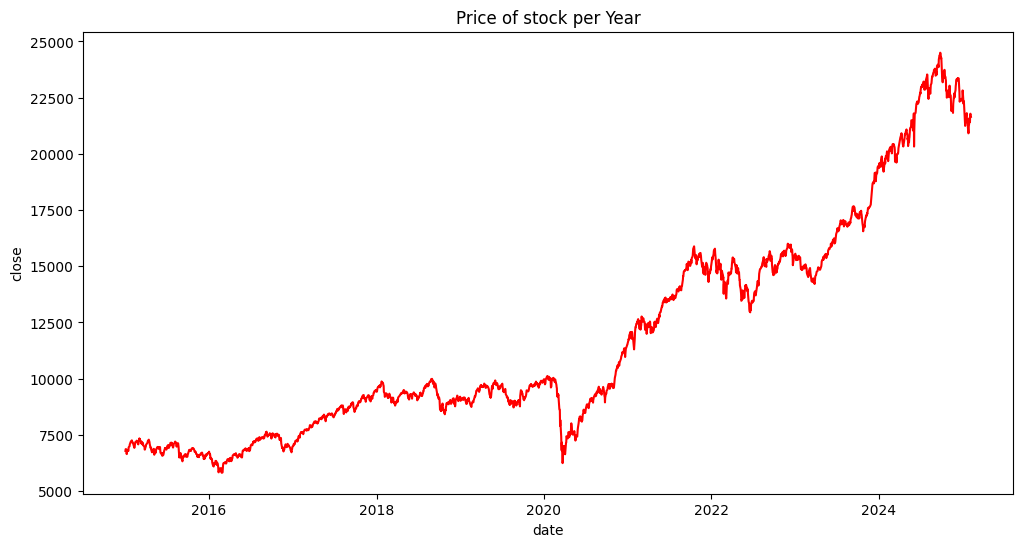

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(x="date",y="close",data=data,color="red")
plt.title("Price of stock per Year")
plt.show()

<Axes: >

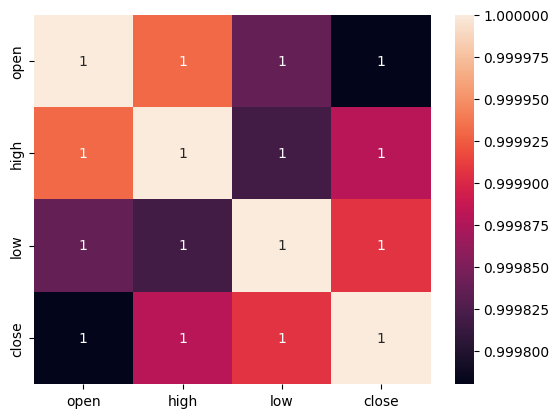

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
data.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

In [20]:
data.duplicated().sum()

0

In [37]:
df=data[["close"]].values

In [39]:
scaler=StandardScaler()
scaler_data=scaler.fit_transform(df)

In [40]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range (sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [43]:
sequence_length=10
X,y=create_sequence(scaler_data,sequence_length)
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(2495, 10, 1) (2495,)


In [46]:
model=Sequential()
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")

In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5882 
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0292
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0238
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0244
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0203
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0211
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219
Epoch 11/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0220
Epoch 12/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176
Epoch 13/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0190
Epoch 14/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192
Epoch 15/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182
Epo

In [49]:
loss=model.evaluate(X,y)
print("Model loss:",loss)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.0011   
Model loss: 0.0015417850809171796


In [50]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:10])

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[6932.0825]
 [6992.1084]
 [7033.06  ]
 [7071.0854]
 [7129.4688]
 [7170.7417]
 [7205.2183]
 [7245.23  ]
 [7291.576 ]
 [7324.0713]]


In [51]:
actual_values=scaler.inverse_transform(y.reshape(-1,1))

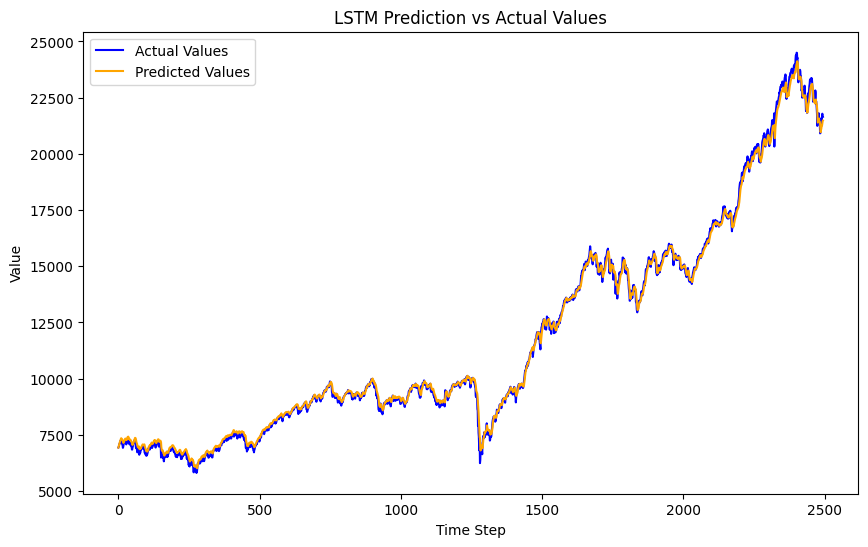

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")  
plt.plot(predictions, label="Predicted Values",color="orange") 
plt.legend()
plt.title('LSTM Prediction vs Actual Values')  
plt.xlabel('Time Step') 
plt.ylabel('Value')  
plt.show()